# GSD: Comparing ambiguous nts results from mitochondrial genome with results from all sequences from 1011 collection

This follows from the following notebooks:

- [`GSD: Assessing ambiguous nts in 1011 collection genomes`](GSD%20Assessing_ambiguous_nts_in_1011_collection_genomesALL.ipynb)
- [`GSD: Assessing ambiguous nts in just mitochondrial genomes from the 1011 cerevisiae collection`](GSD%20Assessing_ambiguous_nts_in_just_mito_of_1011_collection.ipynb)

See those notebooks for previous lines of analyses.

Currently meant to run in [`cl_sq_demo-binder`](https://github.com/fomightez/cl_sq_demo-binder) environment.

----


**DEVELOPMENT WITH JUST TWO OF THE 1011 genomes collection (TINY SET)**

Checks a collection of sequenced cerevisiae genomes from [Peter et al 2018](https://www.ncbi.nlm.nih.gov/pubmed/29643504) for ambiguous/gap-representing residues. Compares them to a roughly dozen genomes sequenced by the PacBio method from [Yue et al., 2017](https://www.ncbi.nlm.nih.gov/pubmed/28416820) as well as the  SGD reference sequence from [here](https://downloads.yeastgenome.org/sequence/S288C_reference/chromosomes/fasta/).

References for sequence data:  
- [Genome evolution across 1,011 Saccharomyces cerevisiae isolates. Peter J, De Chiara M, Friedrich A, Yue JX, Pflieger D, Bergström A, Sigwalt A, Barre B, Freel K, Llored A, Cruaud C, Labadie K, Aury JM, Istace B, Lebrigand K, Barbry P, Engelen S, Lemainque A, Wincker P, Liti G, Schacherer J. Nature. 2018 Apr;556(7701):339-344. doi: 10.1038/s41586-018-0030-5. Epub 2018 Apr 11. PMID: 29643504](https://www.ncbi.nlm.nih.gov/pubmed/29643504)

- [Contrasting evolutionary genome dynamics between domesticated and wild yeasts.
Yue JX, Li J, Aigrain L, Hallin J, Persson K, Oliver K, Bergström A, Coupland P, Warringer J, Lagomarsino MC, Fischer G, Durbin R, Liti G. Nat Genet. 2017 Jun;49(6):913-924. doi: 10.1038/ng.3847. Epub 2017 Apr 17. PMID: 28416820](https://www.ncbi.nlm.nih.gov/pubmed/28416820)


- [Life with 6000 genes. Goffeau A, Barrell BG, Bussey H, Davis RW, Dujon B, Feldmann H, Galibert F, Hoheisel JD, Jacq C, Johnston M, Louis EJ, Mewes HW, Murakami Y, Philippsen P, Tettelin H, Oliver SG. Science. 1996 Oct 25;274(5287):546, 563-7. PMID: 8849441](https://www.ncbi.nlm.nih.gov/pubmed/8849441)
  
  
-----

## Preparation

Upload data and then get scripts and data necessary.


#### Uploading

**Before doing `Run All`, make sure the necessary data has been uploaded.**

Four pickled dataframes (or tabular text files) need to be uploaded for this to work.

Need to upload:

- `PB_n_1011_collection_all_stretchesN_df.pkl` (for first section)
- `mito_from_1011_collection_all_stretchesN_df.pkl` (for first section)
- `PB_n_1011_collection_nt_count_ALL.pkl` (for last two sections)
- `mitos_from_1011_nt_count.pkl` (for last two sections)

These are both sorted so the strains with maximum stretch of Ns occur first in the dataframe, i.e., are at the top.

In [1]:
#Notebook settings
files_required = [
    "PB_n_1011_collection_all_stretchesN_df.pkl",
    "mito_from_1011_collection_all_stretchesN_df.pkl",
    "PB_n_1011_collection_nt_count_ALL.pkl",
    "mitos_from_1011_nt_count.pkl"
    ]

In [2]:
import os
import sys
import pandas as pd
try:
    type(files_required)
except NameError:
    print("Setting `files_required`")
    files_required = ["PB_n_1011_collection_all_stretchesN_df.pkl","mito_from_1011_collection_all_stretchesN_df.pkl","PB_n_1011_collection_nt_count_ALL.pkl","mitos_from_1011_nt_count.pkl"]
for file_required in files_required:
    if os.path.isfile(file_required):
        if file_required == files_required[0]:
            all_df = pd.read_pickle(file_required)
            # remove any data from the PacBio or SGD_ref strain because not concerned here
            all_df = all_df.drop(all_df[(all_df["stretch_size"] > 17000) | (all_df["strain"] == "SGD_ref")].index).reset_index(drop=True)
        elif file_required == files_required[1]:
            mito_df = pd.read_pickle(file_required)
            #also fix `CDH` to `CDH_3` so it will match the designation I changed to at the start of process that made `all_df` data
            mito_df.strain = mito_df.strain.replace({'CDH': 'CDH_3'})
        elif file_required == files_required[2]:
            all_count_df = pd.read_pickle(file_required)
            # remove any data from the PacBio or SGD_ref strain because not concerned here
            all_count_df = all_count_df.drop(all_count_df[(all_count_df["N"] == 17357) | (all_count_df.index == "SGD_REF")].index)
        elif file_required == files_required[3]:
            mito_count_df = pd.read_pickle(file_required)
            #also fix `CDH` to `CDH_3` so it will match the designation I changed to at the start of process that made `all_df` data
            #mito_count_df.index = mito_count_df.index.replace({'CDH': 'CDH_3'}) #<--presently doesn't work; may in future, see https://github.com/pandas-dev/pandas/issues/1949
            replace_indx = lambda x,d: d[x] if x in d else x
            mito_count_df.index = mito_count_df.index.map(lambda x:replace_indx(x, {'CDH': 'CDH_3'}))
        sys.stderr.write("\nFile '{}' observed and"
            " unpickled.".format(file_required))
            #!mv GENOMES_ASSEMBLED/CDH.re.fa GENOMES_ASSEMBLED/CDH_3.re.fa
        # Give correct, specific feedback
        if (file_required == files_required[0]) or (file_required == files_required[2]):
            sys.stderr.write("\nAlso dropped all those not in the 1011"
                " collection from pickled dataframe stored in {}.".format(file_required))
        elif (file_required == files_required[1]) or (file_required == files_required[3]):
            sys.stderr.write("\nAlso for dataframe derived from {} fixed strain designation" 
                " associated with `CDH` so it will match `CDH_3` used in all data set.".format(file_required))
        #!mv GENOMES_ASSEMBLED/CDH.re.fa GENOMES_ASSEMBLED/CDH_3.re.fa
    else:
        sys.stderr.write("\nFile'{}' not seen and so nothing done"
            ".\nSeems wrong!??!\n\n".format(file_required))
        sys.exit(1)


File 'PB_n_1011_collection_all_stretchesN_df.pkl' observed and unpickled.
Also dropped all those not in the 1011 collection from pickled dataframe stored in PB_n_1011_collection_all_stretchesN_df.pkl.
File 'mito_from_1011_collection_all_stretchesN_df.pkl' observed and unpickled.
Also for dataframe derived from mito_from_1011_collection_all_stretchesN_df.pkl fixed strain designation associated with `CDH` so it will match `CDH_3` used in all data set.
File 'PB_n_1011_collection_nt_count_ALL.pkl' observed and unpickled.
Also dropped all those not in the 1011 collection from pickled dataframe stored in PB_n_1011_collection_nt_count_ALL.pkl.
File 'mitos_from_1011_nt_count.pkl' observed and unpickled.
Also for dataframe derived from mitos_from_1011_nt_count.pkl fixed strain designation associated with `CDH` so it will match `CDH_3` used in all data set.

In [3]:
all_df.head()

,strain,stretch_size
0,BGE_8,14597
1,YAE,11569
2,AIP_2,8649
3,BEK_7,8044
4,CLA_5,7743


In [4]:
mito_df.head()

,strain,stretch_size
0,CLA_5,7743
1,CKF_3,632
2,CKH_4,624
3,CKR_1,559
4,CNE_4,519


As of now, I think that should be it for preparation because no extra scripts necessary.

## Compare the ranks of the strains between the two sets where the dataframes were sorted by maximum stretch of Ns

The idea is to filter the list from all the 1011 cerevisiae to just those where have mitochondrial sequence collected and then rank the strains and see if they correlate via Spearman rank correlation.

The dataframes have been sorted prior based on maximum size of the stretch of Ns, and so comparison will be between the ranking of stetches of Ns from all sequences vs. ranking of the stretched of Ns for the mitochondria sequences.

In [5]:
# Presently every stretch of Ns is present but sorted on the basis of the size of `stretch_size`.
#
# For both dataframes, limit to the first occurence of each strain considered from the top. This will
# reduce the dataframes to the maximum stretch for each strain so the ranking can be derived from that.
all_df_first_instances = all_df.drop_duplicates(subset=['strain'], keep='first')
mito_df_first_instances = mito_df.drop_duplicates(subset=['strain'], keep='first')

# Next need to drop those in the list from the 'all' set that don't occur in the collection from the mitochondria
all_df_subset = all_df_first_instances[all_df_first_instances['strain'].isin(mito_df_first_instances.strain)] 
oops_df = mito_df_first_instances[~mito_df_first_instances['strain'].isin(all_df_subset.strain)] # I was using this sorting out `CDH` vs. `CDH_3`
# Now to rank the stains relative maximum stretch size. Going to use `method='first'` to insure
# there are no ties since the default is to average the position of the ties but leaves the same values still (in other words, 
# it still results in ties with default). See https://stackoverflow.com/questions/20975298/pandas-rank-function-yielding-non-integers/20975493#20975493
all_df_subset_with_rank = all_df_subset.copy() # did this to avoid seeing `SettingWithCopyWarning`
mito_df_first_instances_with_rank = mito_df_first_instances.copy() # did this to avoid seeing `SettingWithCopyWarning`
all_df_subset_with_rank['rank_of_strain_fromALLdata'] = all_df_subset.stretch_size.rank(method='first')
mito_df_first_instances_with_rank['rank_of_strain_fromMITOdata'] = mito_df_first_instances.stretch_size.rank(method='first')
# change names of the `stretch_size` column so source will be clear in merged dataframe
all_df_subset_with_rank = all_df_subset_with_rank.rename(columns={'stretch_size':'stretch_size_fromALLdata'})
mito_df_first_instances_with_rank = mito_df_first_instances_with_rank.rename(columns={'stretch_size':'stretch_size_fromMITOdata'})
rankings_df = pd.merge(all_df_subset_with_rank,mito_df_first_instances_with_rank,on='strain')
#print(len(all_df)) # for viewing during development
#print(len(all_df_first_instances)) # for viewing during development
#print(len(all_df_subset)) # for viewing during development
#print(len(mito_df)) # for viewing during development
#len(mito_df_first_instances) # for viewing during development
print ("Ranking of the top-end of the max stretch sizes from the mitochondrial data")
print (mito_df_first_instances_with_rank.head(15))
print ("\n\nBelow is ranking of the bottom-end per strain")
rankings_df.tail(30)

Ranking of the top-end of the max stretch sizes from the mitochondrial data
   strain  stretch_size_fromMITOdata  rank_of_strain_fromMITOdata
0   CLA_5                       7743                        468.0
1   CKF_3                        632                        467.0
2   CKH_4                        624                        466.0
3   CKR_1                        559                        465.0
4   CNE_4                        519                        464.0
6   CDC_3                        506                        461.0
7   CRH_2                        506                        462.0
8   CGT_5                        506                        463.0
13  CKV_5                        490                        460.0
14  CIC_4                        485                        459.0
16  CPQ_4                        481                        458.0
17  CGH_5                        474                        456.0
18  CAP_4                        474                        457.0


,strain,stretch_size_fromALLdata,rank_of_strain_fromALLdata,stretch_size_fromMITOdata,rank_of_strain_fromMITOdata
438,APD_4,258,31.0,129,55.0
439,AQC_4,249,29.0,140,63.0
440,ANP_2,244,28.0,202,130.0
441,ABT_6,235,26.0,90,30.0
442,YDL,235,27.0,235,165.0
443,AHI_3,216,24.0,216,146.0
444,AGH_1,216,25.0,216,147.0
445,ASV_1,212,23.0,212,139.0
446,APN_4,208,22.0,148,76.0
447,AQT_4,207,21.0,204,131.0


**Are the rankings correlated?**

In [6]:
from scipy import stats
rho, pvalue = stats.spearmanr(rankings_df.rank_of_strain_fromALLdata , rankings_df.rank_of_strain_fromMITOdata)
#rho, pvalue = stats.spearmanr(rankings_df.rank_of_strain_fromALLdata.tolist()[:385] , rankings_df.rank_of_strain_fromMITOdata.tolist()[:385] )
print (f"Spearman's rho = {rho:0.9f}, p-value = {pvalue:0.6f}")

Spearman's rho = 0.429406372, p-value = 0.000000


If considering the maximum size of the stretch of 'N's between all sequence data and just the mitochondrial sequence data for those 468 where I collected mitochondrial genomes, the values have a weak to moderate correlation (see [here](https://geographyfieldwork.com/SpearmansRankCalculator.html)) with the p-value < .001 indicating the data showing this correlation is statisically significant. 

The p-value is almost too low to believe since p-values can never be equal to zero. Interestingly, if you use just the end of the rankings with `rho, pvalue = stats.spearmanr(rankings_df.rank_of_strain_fromALLdata.tolist()[390:] , rankings_df.rank_of_strain_fromMITOdata.tolist()[390:] )` you get similar results but with p-value just above .001 i.e., with `Spearman's rho = 0.338681272, p-value = 0.001248`. And so I think it is correct. Along this line if you just use top part of the ranking, i.e., `rho, pvalue = stats.spearmanr(rankings_df.rank_of_strain_fromALLdata.tolist()[:385] , rankings_df.rank_of_strain_fromMITOdata.tolist()[:385] )`, you get drastically different results ===> `Spearman's rho = 0.140274460, p-value = 0.005832`. Making me think the correlation for 'bottom' end of the rankings really skews things to correlating weakly to moderately but the early parts of the ranking don't show correlation well. You can see the 'funneling' of the lower end of the data in the plot below. Maybe this implies the mitochondria data that is present in the 'ALL' data is more apperent when considering lesser-sized stretches of `N`s and it would be best to re-do the analysis with the mitochondrial data removed from those where I had collected it? Or perhaps max stretch size is a poor ranking metric for the population?

(Note I was getting essentially the same value with or without `method='first'` for the ranking step.)

Plotting the rankings:

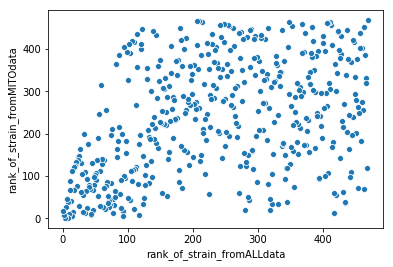

In [7]:
%matplotlib inline 
# technical trick to get plots below to be displayed in this notebook
# see http://stackoverflow.com/questions/26597116/seaborn-plots-not-showing-up

import seaborn as sns  #seaborn is a popular graphing package based on the venerable matplotlib package
plot = sns.scatterplot(x = "rank_of_strain_fromALLdata", y="rank_of_strain_fromMITOdata", data = rankings_df);

----

## Compare the ranks of the strains between the two sets where the count dataframes were sorted by number of Ns

The idea is to filter the counts dataframe from all the 1011 cerevisiae to just those where have mitochondrial sequence collected and then rank the strains by total number of Ns and see if they correlate via Spearman rank correlation.

First to make the situation more like the above section, I am going to convert the strain designations that are currently the row indices to a `strain` column. (I didn't do it earlier when bringing in the dataframe because a lot was going on dealing with four different dataframes, and I wanted to keep the process of dealing with the pickled mito and 'ALL' dataframes as consistent as I could in the early steps. As opposed to adding more steps to the handling of particular dataframes.)

In [8]:
all_count_df = all_count_df.reset_index() #without `drop=True`, former index is kept
all_count_df = all_count_df.rename(columns={'index':'strain'})
mito_count_df = mito_count_df.reset_index().rename(columns={'index':'strain'})

The dataframes have been sorted prior based on both %N and total nts, and so I'll resort based on number of Ns so that I can rank on that. (Presumably, the original sort was very similar, but it is better to be precise here since I state ranking will come from that.) 

In [9]:
# Presently counts of Ns and all letters is present but sorted on the basis of '% N', 'Total_nts'.
#
# I'll sort based on total number of Ns
all_count_df = all_count_df.sort_values('N', ascending=True)
mito_count_df = mito_count_df.sort_values('N', ascending=True)


# Next need to drop those in the list from the 'all' set that don't occur in the collection from the mitochondria
all_count_subset_df = all_count_df[all_count_df['strain'].isin(mito_count_df.strain)] 
oops_df = mito_count_df[~mito_count_df['strain'].isin(all_count_subset_df.strain)] # I am using this verifying `CDH` vs. `CDH_3` handled properly earlier
# Now to rank the stains relative number of Ns. Going to use `method='first'` to insure
# there are no ties since the default is to average the position of the ties but leaves the same values still (in other words, 
# it still results in ties with default). See https://stackoverflow.com/questions/20975298/pandas-rank-function-yielding-non-integers/20975493#20975493
all_count_subset_df_with_rank = all_count_subset_df.copy() # did this to avoid seeing `SettingWithCopyWarning`
mito_count_df_with_rank = mito_count_df.copy() # did this to avoid seeing `SettingWithCopyWarning`
all_count_subset_df_with_rank['rank_of_strain_fromALLdata'] = all_count_subset_df_with_rank.N.rank(method='first')
mito_count_df_with_rank['rank_of_strain_fromMITOdata'] = mito_count_df_with_rank.N.rank(method='first')
# change names of the `N` column so source will be clear in merged dataframe
all_count_subset_df_with_rank = all_count_subset_df_with_rank.rename(columns={'N':'N_fromALLdata'})
mito_count_df_with_rank = mito_count_df_with_rank.rename(columns={'N':'N_fromMITOdata'})
# Making a summary table with the just strains Ns per source and rankings per source
count_rankings_df = pd.merge(
    all_count_subset_df_with_rank[['strain','N_fromALLdata','rank_of_strain_fromALLdata']],
    mito_count_df_with_rank[['strain','N_fromMITOdata','rank_of_strain_fromMITOdata']], on='strain')
#print(len(all_df)) # for viewing during development
#print(len(all_df_first_instances)) # for viewing during development
#print(len(all_df_subset)) # for viewing during development
#print(len(mito_df)) # for viewing during development
#len(mito_df_first_instances) # for viewing during development
print ("Ranking of the high-end for numbers of Ns from the mitochondrial data (highest at bottom)")
print (mito_count_df_with_rank.tail(15))
print ("\n\nBelow is ranking of the lower-end in regards to number of Ns per strain")
count_rankings_df.head(30)

Ranking of the high-end for numbers of Ns from the mitochondrial data (highest at bottom)
   strain      A      T     G     C    M  N_fromMITOdata    K     t     a  \
23  CPR_4  34641  35758  6823  7632  0.0         13936.0  0.0   1.0   3.0   
21  CPQ_4  35137  36262  6924  7745  0.0         14173.0  1.0   2.0   1.0   
13  CMG_6  32319  31493  7153  6315  1.0         14201.0  2.0   1.0   1.0   
11  CQI_6  32396  33218  5341  6007  1.0         14348.0  0.0  16.0   7.0   
14  CRH_2  33277  33875  6113  6923  0.0         14459.0  1.0  15.0   8.0   
4   CMN_8  31450  30839  6130  5540  3.0         14524.0  0.0  49.0  44.0   
10  CAP_4  33722  32886  6551  5875  0.0         14750.0  0.0  10.0  15.0   
5   CNL_4  32509  31657  6758  6077  1.0         14911.0  1.0   0.0   0.0   
9   CKR_1  33229  34201  5765  6580  0.0         15134.0  2.0  38.0  33.0   
7   CLA_5  32979  33906  6176  6762  2.0         15424.0  1.0  19.0  20.0   
2   CMT_8  25284  26036  5263  6002  1.0         15515.0  3.0  

,strain,N_fromALLdata,rank_of_strain_fromALLdata,N_fromMITOdata,rank_of_strain_fromMITOdata
0,YDE,2155.0,1.0,150.0,5.0
1,GAV,2736.0,2.0,0.0,1.0
2,GAP,2740.0,3.0,0.0,2.0
3,YAQ,3281.0,4.0,668.0,18.0
4,GAL,3711.0,5.0,50.0,3.0
5,YCT,3754.0,6.0,100.0,4.0
6,YCH,3867.0,7.0,600.0,16.0
7,YDL,4032.0,8.0,335.0,8.0
8,YAL,4134.0,9.0,533.0,13.0
9,YCV,4139.0,10.0,483.0,12.0


**Are the rankings correlated?**

In [10]:
from scipy import stats
rho, pvalue = stats.spearmanr(count_rankings_df.rank_of_strain_fromALLdata , count_rankings_df.rank_of_strain_fromMITOdata)
#rho, pvalue = stats.spearmanr(count_rankings_df.rank_of_strain_fromALLdata.tolist()[:385] , count_rankings_df.rank_of_strain_fromMITOdata.tolist()[:385] )
print (f"Spearman's rho = {rho:0.9f}, p-value = {pvalue:0.63f}")

Spearman's rho = 0.642033614, p-value = 0.000000000000000000000000000000000000000000000000000000097252925


If considering the number 'N's between all sequence data and just the mitochondrial sequence data for those 468 where I collected mitochondrial genomes, the values have a moderate correlation (see [here](https://geographyfieldwork.com/SpearmansRankCalculator.html)) with the p-value < .001 indicating the data showing this correlation is statisically significant. 

The Spearman's rank correlation suggest ranking on this characteristic correlates better than the maximum size of the stretch of Ns.

Plotting the rankings seems reflect the better correlation as well:

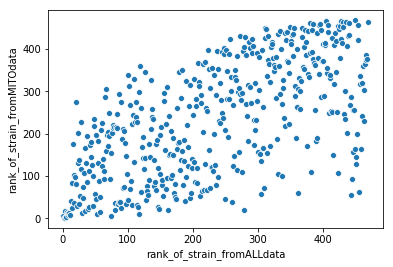

In [11]:
%matplotlib inline 
# technical trick to get plots below to be displayed in this notebook
# see http://stackoverflow.com/questions/26597116/seaborn-plots-not-showing-up

import seaborn as sns  #seaborn is a popular graphing package based on the venerable matplotlib package
plot = sns.scatterplot(x = "rank_of_strain_fromALLdata", y="rank_of_strain_fromMITOdata", data = count_rankings_df);

----

## Compare the ranks of the strains between the two sets where the count dataframes were sorted by percent of Ns

The idea is to filter the counts dataframe from all the 1011 cerevisiae to just those where have mitochondrial sequence collected and then rank the strains by percent of Ns and see if they correlate via Spearman rank correlation.

Since used above and `strain` column already added, I am going to make a copy of the pickled dataframes for modifying in this section.

In [12]:
all_percent_df = all_count_df.copy()
mito_percent_df = mito_count_df.copy()

Now to process simialr to section above but dealing with percent.

In [13]:
# Be sure sorted on the basis of '% N'
#
# I'll sort based on total number of Ns
all_percent_df = all_percent_df.sort_values('% N', ascending=True)
mito_percent_df = mito_percent_df.sort_values('% N', ascending=True)


# Next need to drop those in the list from the 'all' set that don't occur in the collection from the mitochondria
all_percent_subset_df = all_percent_df[all_percent_df['strain'].isin(mito_percent_df.strain)] 
oops_df = mito_percent_df[~mito_percent_df['strain'].isin(all_percent_subset_df.strain)] # I am using this verifying `CDH` vs. `CDH_3` handled properly earlier
# Now to rank the stains relative number of Ns. Going to use `method='first'` to insure
# there are no ties since the default is to average the position of the ties but leaves the same values still (in other words, 
# it still results in ties with default). See https://stackoverflow.com/questions/20975298/pandas-rank-function-yielding-non-integers/20975493#20975493
all_percent_subset_df_with_rank = all_percent_subset_df.copy() # did this to avoid seeing `SettingWithCopyWarning`
mito_percent_df_with_rank = mito_percent_df.copy() # did this to avoid seeing `SettingWithCopyWarning`
all_percent_subset_df_with_rank['rank_of_strain_fromALLdata'] = all_percent_subset_df_with_rank['% N'].rank(method='first')
mito_percent_df_with_rank['rank_of_strain_fromMITOdata'] = mito_percent_df_with_rank['% N'].rank(method='first')
# change names of the `N` column so source will be clear in merged dataframe
all_percent_subset_df_with_rank = all_percent_subset_df_with_rank.rename(columns={'% N':'% N_fromALLdata'})
mito_percent_df_with_rank = mito_percent_df_with_rank.rename(columns={'% N':'% N_fromMITOdata'})
# Making a summary table with the just strains Ns per source and rankings per source
percent_rankings_df = pd.merge(
    all_percent_subset_df_with_rank[['strain','% N_fromALLdata','rank_of_strain_fromALLdata']],
    mito_percent_df_with_rank[['strain','% N_fromMITOdata','rank_of_strain_fromMITOdata']], on='strain')
#print(len(all_df)) # for viewing during development
#print(len(all_df_first_instances)) # for viewing during development
#print(len(all_df_subset)) # for viewing during development
#print(len(mito_df)) # for viewing during development
#len(mito_df_first_instances) # for viewing during development
print ("Ranking of the high-end for percent N from the mitochondrial data (highest at bottom)")
print (mito_percent_df_with_rank.tail(15))
print ("\n\nBelow is ranking of the lower-end in regards to percent N per strain")
percent_rankings_df.head(30)

Ranking of the high-end for percent N from the mitochondrial data (highest at bottom)
   strain      A      T     G     C    M        N    K     t     a    R    g  \
14  CRH_2  33277  33875  6113  6923  0.0  14459.0  1.0  15.0   8.0  0.0  0.0   
13  CMG_6  32319  31493  7153  6315  1.0  14201.0  2.0   1.0   1.0  0.0  0.0   
12  CMP_8  31314  31889  5101  5734  1.0  13682.0  3.0   1.0   2.0  0.0  0.0   
11  CQI_6  32396  33218  5341  6007  1.0  14348.0  0.0  16.0   7.0  0.0  0.0   
10  CAP_4  33722  32886  6551  5875  0.0  14750.0  0.0  10.0  15.0  0.0  5.0   
9   CKR_1  33229  34201  5765  6580  0.0  15134.0  2.0  38.0  33.0  0.0  0.0   
8   BTS_3  29656  30135  5249  5798  1.0  13587.0  0.0   0.0   0.0  0.0  0.0   
7   CLA_5  32979  33906  6176  6762  2.0  15424.0  1.0  19.0  20.0  0.0  2.0   
6   CNK_4  34055  32933  7339  6434  0.0  15638.0  0.0   4.0   7.0  0.0  3.0   
5   CNL_4  32509  31657  6758  6077  1.0  14911.0  1.0   0.0   0.0  0.0  0.0   
4   CMN_8  31450  30839  6130  554

,strain,% N_fromALLdata,rank_of_strain_fromALLdata,% N_fromMITOdata,rank_of_strain_fromMITOdata
0,YDE,0.000179,1.0,0.001641,5.0
1,GAV,0.000230,2.0,0.000000,1.0
2,GAP,0.000233,3.0,0.000000,2.0
3,YAQ,0.000273,4.0,0.008799,21.0
4,GAL,0.000312,5.0,0.000590,3.0
5,YCT,0.000314,6.0,0.001222,4.0
6,YCH,0.000322,7.0,0.006882,16.0
7,YDL,0.000336,8.0,0.003959,8.0
8,YAL,0.000346,9.0,0.006000,13.0
9,YCV,0.000347,10.0,0.005950,12.0


**Are the rankings correlated?**

In [14]:
from scipy import stats
rho, pvalue = stats.spearmanr(percent_rankings_df.rank_of_strain_fromALLdata , percent_rankings_df.rank_of_strain_fromMITOdata)
#rho, pvalue = stats.spearmanr(percent_rankings_df.rank_of_strain_fromALLdata.tolist()[:385] , percent_rankings_df.rank_of_strain_fromMITOdata.tolist()[:385] )
print (f"Spearman's rho = {rho:0.9f}, p-value = {pvalue:0.63f}")

Spearman's rho = 0.641474487, p-value = 0.000000000000000000000000000000000000000000000000000000129344106


If considering the number 'N's between all sequence data and just the mitochondrial sequence data for those 468 where I collected mitochondrial genomes, the values have a moderate correlation (see [here](https://geographyfieldwork.com/SpearmansRankCalculator.html)) with the p-value < .001 indicating the data showing this correlation is statisically significant. 

The Spearman's rank correlation suggest ranking on this characteristic correlates almost as well as the total number of Ns. This is to be expected given the genomes are all from cerevisiae so they wouldn't be expected to vary dramatically in size and so the percent should follow from what the total Ns data showed, since  essentially dividing total Ns by a similar number to get percent used here.

Plotting the rankings seems reflect the data correlating only slightly better than the total number of Ns:

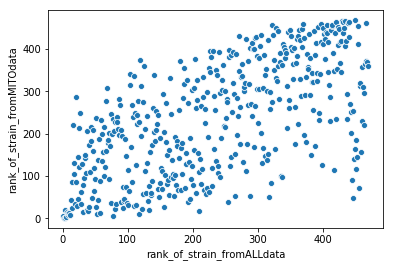

In [15]:
%matplotlib inline 
# technical trick to get plots below to be displayed in this notebook
# see http://stackoverflow.com/questions/26597116/seaborn-plots-not-showing-up

import seaborn as sns  #seaborn is a popular graphing package based on the venerable matplotlib package
plot = sns.scatterplot(x = "rank_of_strain_fromALLdata", y="rank_of_strain_fromMITOdata", data = percent_rankings_df);

-----

In [16]:
import time

def executeSomething():
    #code here
    print ('.')
    time.sleep(480) #60 seconds times 8 minutes

while True:
    executeSomething()

.


KeyboardInterrupt: 